<a href="https://colab.research.google.com/github/ishita966/2018_snu_hackathon_BitsNBytes/blob/master/feature_region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

In [0]:
# some setting for this notebook to actually show the graphs inline
# you probably won't need this
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

0         9
1        14
2        28
3        15
4        35
5        23
6        23
7         3
8        35
9        22
10       38
11        9
12        1
13       36
14       24
15        9
16       18
17       34
18        6
19        9
20       10
21       24
22       18
23       11
24       37
25       19
26       26
27       20
28       31
29        5
         ..
18258    14
18259     5
18260    35
18261    13
18262    12
18263    29
18264    20
18265    35
18266     5
18267    30
18268    25
18269    12
18270    13
18271    37
18272    16
18273    24
18274    34
18275    33
18276    29
18277    21
18278    34
18279    11
18280    38
18281     2
18282    25
18283    22
18284    26
18285    16
18286     4
18287    16
Name: Region, Length: 18288, dtype: int64
0        26
1        17
2        23
3        27
4        17
5        27
6        23
7        17
8        25
9        31
10       31
11       27
12       29
13       31
14       19
15       25
16       17
17       29
18       2

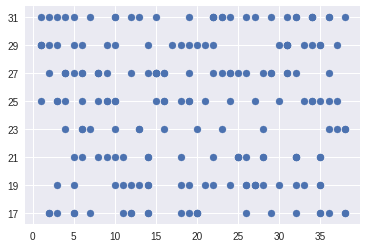

In [100]:
# generate two clusters: a with 100 points, b with 50:
#np.random.seed(4711)  # for repeatability of this tutorial
#a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
#b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
#X = np.concatenate((a, b),)
#print( X.shape)  # 150 samples with 2 dimensions
#plt.scatter(X[:,0], X[:,1])
#plt.show()


train=pd.read_csv("Train.csv")
a=train['Region']
print(a)
a=a[1:200]
#print(a)
#print(train['Feature1'])
df1= train['Feature1']
#print(df1)
df2= train['Feature2']
#print(df2)
df3= train['Feature3']
#print(df3)
df4= train['Feature4']
#print(df4)
df5= train['Feature5']
#print(df5)
result = pd.concat([df1,df2,df3, df4,df5], axis=1)
#print(result)
train['combination']= train.Feature1.map(str)  + train.Feature2.map(str)  + train.Feature3.map(str) +  train.Feature4.map(str)+  train.Feature5.map(str)
#print(train['combination'])
#print(train)

b = (train['Decimal'])
print(b)
#for i  in range(b.shape[0]):
 # b[i]= int(b[i],2)
b=b[1:200]
#b = int((df1+df2+df3+df4+df5),2)
#print(b)
#df3=1df1.combine_first(df2)
#print(df3)
#train['concat'] = pd.Series(b[['Feature1', 'Feature2']].fillna('').values.tolist()).str.join('')
#b=train['concat']
#b=int(np.concatenate((train['Feaure1'],train['Feaure2'],train['Feaure3'],train['Feaure4'],train['Feaure5']),),2)
#print(b['concat'])
c=train['Combination']
X = pd.concat([a,c],axis=1)
print(X)
#print(X(5,1))
print( X.shape)  # 150 samples with 2 dimensions
plt.scatter(a[1:20], b[1:20])
plt.show()
plt.scatter(a[1:80], b[1:80])
plt.show()
#print(X[:0])
#print(X[:1])
#plt.scatter(X[:0], X[:1])
#plt.show()
plt.scatter(a, b,marker='o')
plt.show()

#print(train)

In [101]:
# generate the linkage matrix
Z = linkage(X, 'ward')

ValueError: ignored

In [0]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

In [0]:
Z[0]

In [0]:
Z[1]

In [0]:
Z[0:20]

In [0]:
a[[8, 16, 17]]
b[[8,16,17]]

In [0]:
idxs = [1, 70, 62]
plt.figure(figsize=(10, 8))
plt.scatter(a, b)  # plot all points
plt.scatter(a[idxs], a[idxs], c='r')  # plot interesting points in red again
plt.show()

In [0]:
idxs = [1, 70, 62]
plt.figure(figsize=(10, 8))
plt.scatter(a, b)
plt.scatter(a[idxs], a[idxs], c='r')
idxs = [15, 69, 41]
plt.scatter(a[idxs], a[idxs], c='y')
plt.show()

In [0]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [0]:
Z[-4:,2]

In [0]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [0]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)

plt.show()

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [0]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
plt.show()

In [0]:
# set cut-off to 50
max_d = 50  # max_d as in max_distance

In [0]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [0]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

In [0]:
depth = 3
incons = inconsistent(Z, depth)
incons[-10:]

In [0]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)


In [0]:
c = np.random.multivariate_normal([40, 40], [[20, 1], [1, 30]], size=[200,])
d = np.random.multivariate_normal([80, 80], [[30, 1], [1, 30]], size=[200,])
e = np.random.multivariate_normal([0, 100], [[100, 1], [1, 100]], size=[200,])
X2 = np.concatenate((X, c, d, e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [0]:
Z2 = linkage(X2, 'ward')
plt.figure(figsize=(10,10))
fancy_dendrogram(
    Z2,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=40,
    max_d=170,
)
plt.show()


In [0]:
last = Z2[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [0]:
print (inconsistent(Z2, 5)[-10:])

In [0]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

In [0]:
k=2
fcluster(Z, k, criterion='maxclust')

In [0]:
from scipy.cluster.hierarchy import fcluster
fcluster(Z, 8, depth=10)


In [0]:
plt.figure(figsize=(10, 8))

   
plt.scatter(a, b, c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

In [0]:
final=fcluster(Z,8)

In [0]:
final[3]

In [0]:
final[1:4]